<a href="https://colab.research.google.com/github/ZsofiaK/masterthesis/blob/main/Implementation/Experimentation/Motion_based_frame_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np

def select_frames_motion_absdiff(video_path, total_frames=None, nr_frames=10):
    """
    Selects frames from a video based on motion.

    :param: video_path: Path to the video file.
    :param: total_frames: NOT NEEDED in this function.
    :param: nr_frames: Number of frames to select.
    :return: List of selected frame indices, sorted in ascending order.
    """
    cap = cv2.VideoCapture(video_path)

    # Read the first frame
    ret, prev_frame = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
        return []

    # Convert frame to grayscale
    prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    frame_diffs = []
    frame_indices = []

    current_index = 1  # Start from the second frame

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert current frame to grayscale
        current_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Calculate the absolute difference between current and previous frame
        diff = cv2.absdiff(current_frame, prev_frame)
        sum_diff = np.sum(diff)  # Summing up the differences

        frame_diffs.append(sum_diff)
        frame_indices.append(current_index)

        # Update previous frame
        prev_frame = current_frame
        current_index += 1

    cap.release()

    # Find indices of the frames with the highest motion
    indices_sorted_by_motion = np.argsort(frame_diffs)[-nr_frames:]

    # Convert indices to frame numbers, sort them, and return
    selected_frame_numbers = [frame_indices[i] for i in sorted(indices_sorted_by_motion)]

    return selected_frame_numbers

In [3]:
# Example usage
video_path = 'video1_clip3.mp4'
nr_frames = 10

selected_frames = select_frames_motion_absdiff(video_path, None, nr_frames)

print("Selected frame indices:", selected_frames)

Selected frame indices: [2, 4, 6, 8, 26, 39, 86, 87, 146, 206]


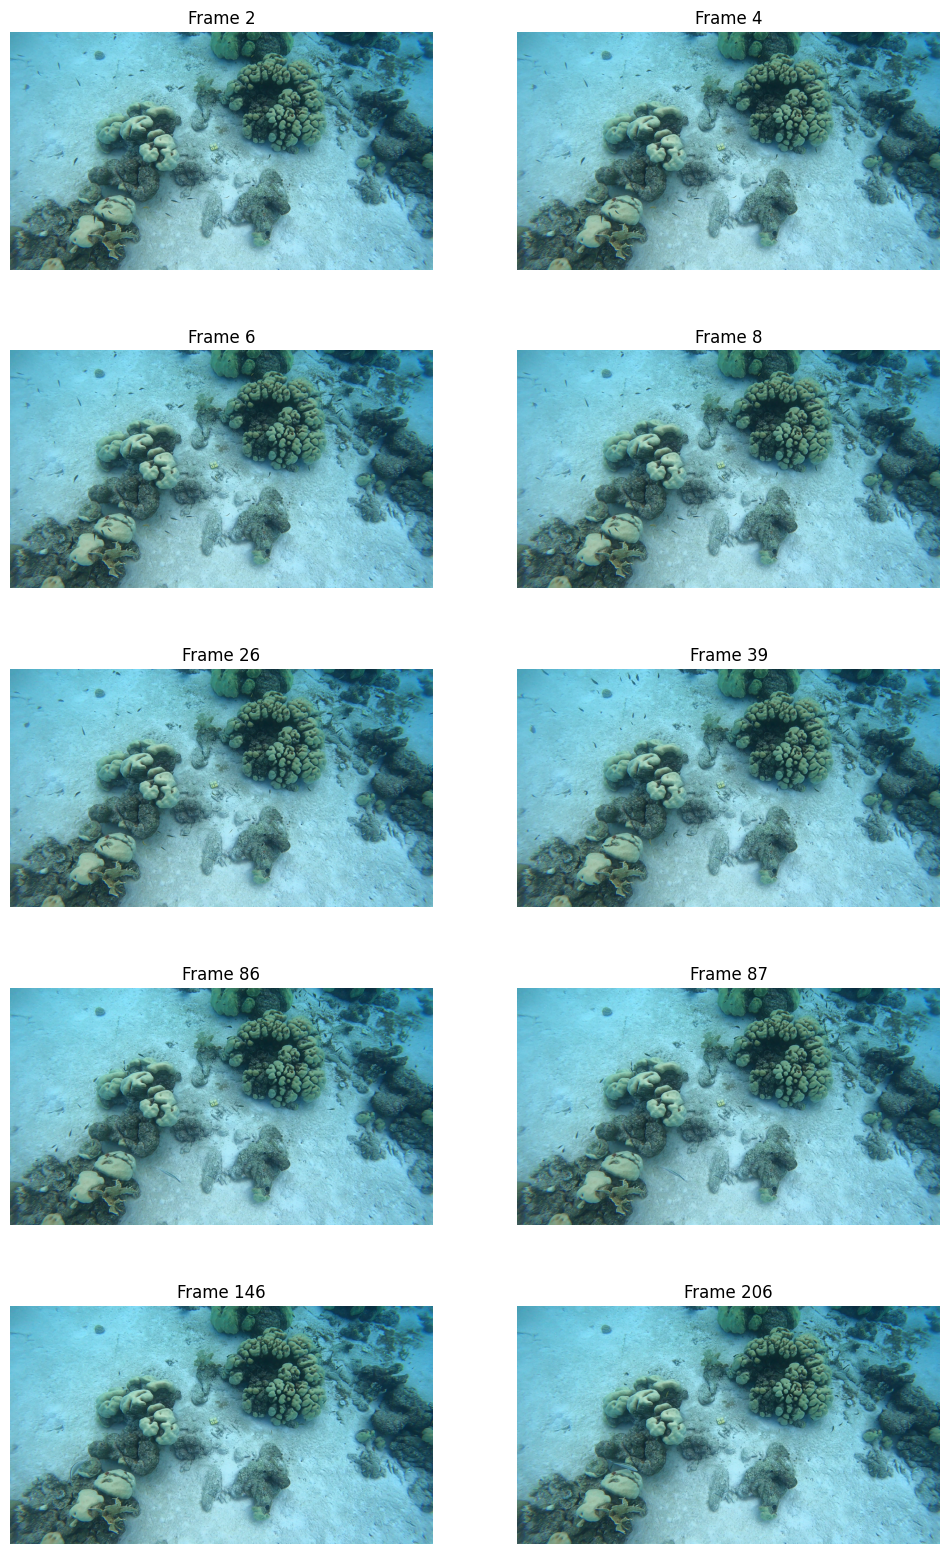

In [16]:
# Display selected frames
import matplotlib.pyplot as plt

# Open the video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")

else:
    frames_to_display = []
    current_frame_index = 0

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        if current_frame_index in selected_frames:
            # Convert the frame from BGR to RGB for displaying
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames_to_display.append((current_frame_index, frame_rgb))

        current_frame_index += 1

    cap.release()

    # Calculate the number of rows needed (2 frames per row)
    num_frames = len(frames_to_display)
    num_rows = (num_frames + 1) // 2  # this ensures an extra row if there's an odd number of frames

    # Plotting the selected frames
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

    # If there's only one frame to display, turn axes into a 2D list for consistency
    if num_frames == 1:
        axes = [[axes]]

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Hide all unused subplots if the number of frames is odd
    for ax in axes[num_frames:]:
        ax.axis('off')

    # Display each frame in its subplot
    for ax, (idx, frame) in zip(axes, frames_to_display):
        ax.imshow(frame)
        ax.set_title(f'Frame {idx}')
        ax.axis('off')

    plt.tight_layout
    plt.show()
